<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.959 · Visualització de dades · PRA2</p>
<p style="margin: 0; text-align:right;">2022 - Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nom i cognoms:</strong> David Malvesí José
</div>

# PRA 2: Creació de la visualització i lliurament del projecte

Índex:

 <ol start="1">
  <li>Introducció</li>
  <li>Selecció del conjunt de dades
  <br>2.1 Objectiu
  <br>2.2 Preparació   
  <li>Creació de la visualització
  <br>3.1 Plantejament de preguntes
  <br>3.2 Exploració de les dades i anàlisi estadístic bàsic
  <br>3.3 Disseny: com representar les dades
  <br>3.4 El procés de visualització
</ol>

## 1. Introducció

El present projecte d'estudi contempla desenvolupar una visualització de dades que expliqui un conjunt de dades triat a partir d'una sèrie de qüestions definides. S'emprarà eines diverses i avançades per a la creació de visualitzacions.

## 2. Selecció del conjunt de dades

### 2.1 Objectiu

Es selecciona un conjunt de dades extens: data-homicides

Link: https://github.com/washingtonpost/data-homicides

Dataset: https://raw.githubusercontent.com/washingtonpost/datahomicides/master/homicide-data.csv

Consisteix en un conjunt de 50.000 assassinats no resolts d’EEUU. El joc té dades de
noms, edats, latituds-longituds, estats,... un gran nombre d’atributs i de tot tipus.

La llicència és lliure, i l’ha generat el diari the Washington Post. S’empra com a selecció
personal, no hi ha motius professionals.

El conjunt en si no té gaire relevància, i du força temps sense ser modificat. Les últimes morts registrades són del 2017, així que no són dades actuals ni actualitzades. Pero tracten molts temes com la raça, edat, finalització del cas, gènere de la persona etc,...

Les variables són les següents:

* Uid: Codi clau primària que engloba estat i un número
* Reported_date: Date. Data de l’assassinat
* Victim_last: qualitativa. Cognom de la víctima
* Victim_first: qualitativa. Nom de la víctima
* Victim_race: qualitativa. Raça de la víctima
* Age: Quantitativa. Edat de la víctima
* Sex: Qualitativa. Gènere de la víctima
* City: Qualitativa. Ciutat de l’assassinat
* State: Qualitativa. Estat de l’assassinat
* Lat: Quantitativa. Coordenades de l’assassinat
* Lon: Quantitativa. Coordenades de l’assassinat
* Disposition: Quantitativa. Estat actual del cas


### 2.2 Preparació de les dades

Tot seguit s'importarà les dades així com la comprovació de la seva integritat, diversitat i credibilitat.

In [1]:
# El primer que es farà és importar les llibreries que s'empraran:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# S'importa el joc de dades

df = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv", encoding="unicode_escape")

In [3]:
# S'observen les primeres files del dataset

df.head()

uid  reported_date  victim_last victim_first victim_race victim_age  \
0  Alb-000001       20100504       GARCIA         JUAN    Hispanic         78   
1  Alb-000002       20100216      MONTOYA      CAMERON    Hispanic         17   
2  Alb-000003       20100601  SATTERFIELD      VIVIANA       White         15   
3  Alb-000004       20100101     MENDIOLA       CARLOS    Hispanic         32   
4  Alb-000005       20100102         MULA       VIVIAN       White         72   

  victim_sex         city state        lat         lon            disposition  
0       Male  Albuquerque    NM  35.095788 -106.538555  Closed without arrest  
1       Male  Albuquerque    NM  35.056810 -106.715321       Closed by arrest  
2     Female  Albuquerque    NM  35.086092 -106.695568  Closed without arrest  
3       Male  Albuquerque    NM  35.078493 -106.556094       Closed by arrest  
4     Female  Albuquerque    NM  35.130357 -106.580986  Closed without arrest

In [4]:
# Es comprova la integritat del dataset amb l'absència de valors nuls

print("En total hi ha {} atributs i els noms són: {}\n".format(len(df.columns), list(df.columns.values)))
print("El dataset conté un total de {} entrades\n".format(df[df.columns[0]].count()))
print("Es mostren el conjunt de valors nulls per atribut: \n{}".format(df.isna().sum()))

En total hi ha 12 atributs i els noms són: ['uid', 'reported_date', 'victim_last', 'victim_first', 'victim_race', 'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon', 'disposition']

El dataset conté un total de 52179 entrades

Es mostren el conjunt de valors nulls per atribut: 
uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64


In [5]:
# Addicionalment s'ha detectat test en columnes de valors numèrics

df['victim_age'].str.count("Unknown").sum()

2999

Degut a la poca quantiat de nuls que existeixen, es decideix eliminar aquestes entrades per a tenir el dataset complet.

In [6]:
dfc = df.dropna()
dfc = dfc[dfc['victim_age'].str.contains('Unknown') == False]

# Es comprova l'eliminació

dfc.isna().sum()

uid              0
reported_date    0
victim_last      0
victim_first     0
victim_race      0
victim_age       0
victim_sex       0
city             0
state            0
lat              0
lon              0
disposition      0
dtype: int64

In [7]:
# Es comprova l'existència de valors duplicats

dfc.groupby(dfc.columns.tolist(),as_index=False).size().count()

uid              49121
reported_date    49121
victim_last      49121
victim_first     49121
victim_race      49121
victim_age       49121
victim_sex       49121
city             49121
state            49121
lat              49121
lon              49121
disposition      49121
size             49121
dtype: int64

Tenint en compte que inicialment existien 52179 valors i s'havien eliminat 61 més 2999, no existeix cap valor duplicat.

In [8]:
# Es comprova el format de cada columna

dfc.dtypes

uid               object
reported_date      int64
victim_last       object
victim_first      object
victim_race       object
victim_age        object
victim_sex        object
city              object
state             object
lat              float64
lon              float64
disposition       object
dtype: object

Aquí s'observa que hi ha molta feina a preprocessar els números com l'edat es troven en format incorrecte, i la data 'reported_date' tampoc és llegible.

In [9]:
# Es canviarà el format de l'edat

dfc['victim_age'] = pd.to_numeric(dfc['victim_age'])

In [10]:
# Es crea la nova columna amb format data

dfc['reported_date_fixed'] = dfc['reported_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) 

# S'elimina la columna reported_date

dfc = dfc.drop(columns = ['reported_date'])

In [11]:
# Es comprova que es té el dataset completament corregit

dfc.dtypes

uid                            object
victim_last                    object
victim_first                   object
victim_race                    object
victim_age                      int64
victim_sex                     object
city                           object
state                          object
lat                           float64
lon                           float64
disposition                    object
reported_date_fixed    datetime64[ns]
dtype: object

## 3. Creació de la visualització
### 3.1 Plantejament de les preguntes

El primer és determinar a qui va dirigida la visualització, i és que, tenint en compte que les dades no són técniques, sinò que són de coneixement general, la intenció és que la visualització vagi destinada a tot el públic en general, i no englobant només a la ciutadania d'Estats Units, sinò també a la resta del món que desitgi consultar-les.

Remarcar moltíssim el context previ a les visualitzacions on Estats Units és un dels països on hi ha lliure circulació d'armes de foc i cada cop s'està dirigint en un país on la desigualtat augmenta exponencialment. Actualment EEUU té un índex de pobresa del 12%, i l'1% de la població més rica cada cop està ingressant més. Potser aquests punts haurien de plantejar-se sobre la taula, ja que tractant-se del país més ric del món potser és impropi que hi hagi tanta població al carrer. Només el lloguer per viure ja repressenta gairebé el 100% dels ingressos de molts estadiunidencs en les grans ciutats com San Francisco, i la població es veu destinada a compartir pis. Aquestes dades haurien de col·locar-se a la visualització, ja que dónen molta informació al context al qual es pot donar aquesta clase d'assasinats.

Moltes d'aquestes dades poden ser contrastades a la BBC:

https://www.bbc.com/mundo/noticias-47488330

Arribats a aquest punt i tenint en compte del context gloval de les dades, es plantegen les següents qüestions:

- Qui són les víctimes? hi ha alguna relació entre la raça, gènere i com ha acabat el cas?
- On han succeït els casos? hi ha alguna regió que s'hauria d'evitar?
- L'edat de les víctimes és representatiu?
- Podem dir que els casos d'assasinats és un problema del passat? o pel contrari segueix succeïnt avui en dia?

Es pot donar resposta a totes les preguntes amb el dataset? Sí, almenys fins al 2017, última entrada de les dades. També es confia que la font de les dades és el diari theWashingtonPost, un medi de comunicació molt important a nivel global. Recordar que les dades contenen la raça, data i localització de cadascun dels assasinats.

Per les respostes, s'haurà d'emprar totes les dades excepte l'índex [uid] i els noms i cognoms de les víctimes.

Així doncs, s'eliminen del dataset per fer-lo compacte:

In [12]:
dfc = dfc.drop(columns = ['uid', 'victim_first', 'victim_last'])

In [13]:
dfc.head()

victim_race  victim_age victim_sex         city state        lat  \
0    Hispanic          78       Male  Albuquerque    NM  35.095788   
1    Hispanic          17       Male  Albuquerque    NM  35.056810   
2       White          15     Female  Albuquerque    NM  35.086092   
3    Hispanic          32       Male  Albuquerque    NM  35.078493   
4       White          72     Female  Albuquerque    NM  35.130357   

          lon            disposition reported_date_fixed  
0 -106.538555  Closed without arrest          2010-05-04  
1 -106.715321       Closed by arrest          2010-02-16  
2 -106.695568  Closed without arrest          2010-06-01  
3 -106.556094       Closed by arrest          2010-01-01  
4 -106.580986  Closed without arrest          2010-01-02

Així que finalment s'exporta el csv per començar a representar i treballar les dades

In [14]:
dfc.to_csv('assassinats_tractat.csv')

### 3.2 Exploració de les dades i anàlisi estadístic bàsic
A continuació es mostra una primera visualització de les dades. Primerament es descriuen les variables categòriques:

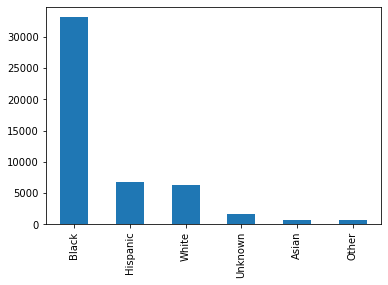

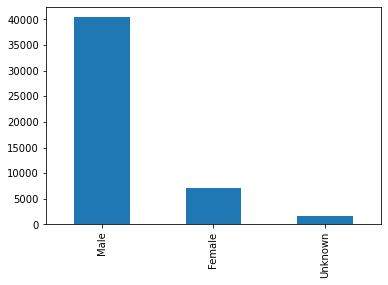

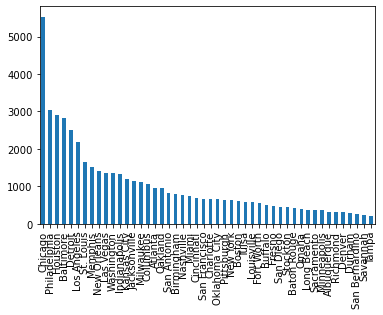

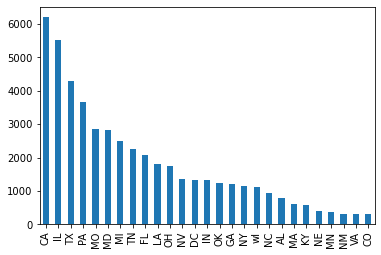

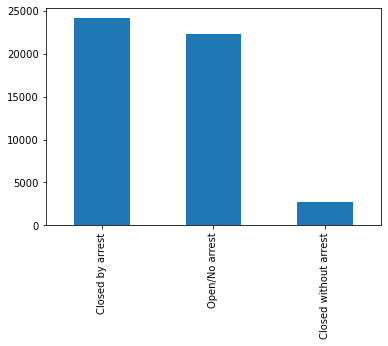

In [15]:
# De les variables categòriques s'observa que el nom com el cognom de les víctimes no aporta 
# gaire valor i a més a més hi pot haver moltes entrades diferents. És per això que es tractarà 
# l'estat, raça, sexe, ciutat i estat actual del cas.

feats_to_explore = ['victim_race', 'victim_sex', 'city', 'state', 'disposition']

for n in feats_to_explore:
    plt.figure()
    dfc[n].value_counts().plot(kind='bar')

Crida a l'atenció com el major nombre de víctimes han sigut negres, l'estat amb més assassinats California, la ciutat amb més Chicago i les víctimes majoritàriament són homes.

Sobre les dades numèriques és inmediat trobar les dades següents:

In [16]:
# Mitja i desviació estàndard

dfc.describe()

victim_age           lat           lon
count  49121.000000  49121.000000  49121.000000
mean      31.801368     37.249178    -90.907053
std       14.413426      4.360110     13.750649
min        0.000000     25.725214   -122.507779
25%       22.000000     34.041800    -95.473278
50%       28.000000     38.674687    -87.665483
75%       40.000000     40.394602    -81.664154
max      102.000000     45.051190    -71.011519

<AxesSubplot:xlabel='victim_age', ylabel='Count'>

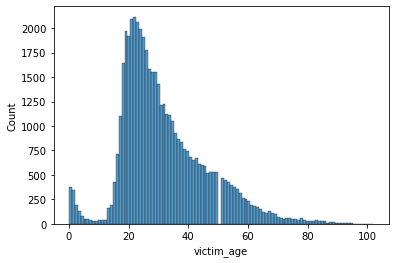

In [17]:
# Histograma explicatiu de la variable 'victim_age'

sns.histplot(dfc, x = 'victim_age')

Sembla ser que no comparteix del tot que sigui una variable que segueixi la llei normal.

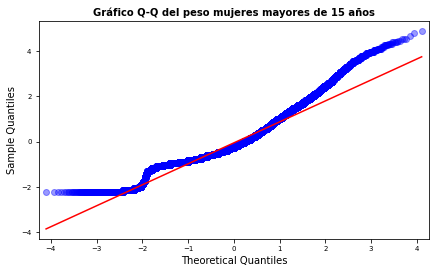

In [18]:
# Gràfic Q-Q

fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    dfc['victim_age'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [19]:
# Shapiro-Wilk test

shapiro_test = stats.shapiro(dfc['victim_age'])
shapiro_test

ShapiroResult(statistic=0.9401666522026062, pvalue=0.0)

In [20]:
# D'Agostino's K-squared test

k2, p_value = stats.normaltest(dfc['victim_age'])
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 6108.778562286738, p-value = 0.0


Finalment es comprova que la variable 'victim_age' no segueix la llei normal, ja que amb el p-value tant baix (nivell triat de 0.05) es rebutja la hipòtesis nul·la de normalitat.

Tot i així es cerca per outliers i sembla ser que no n'hi ha ja que tots els valors són realistes:

<AxesSubplot:ylabel='victim_age'>

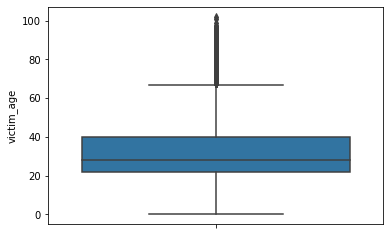

In [21]:
sns.boxplot(y=dfc['victim_age'], data = dfc)

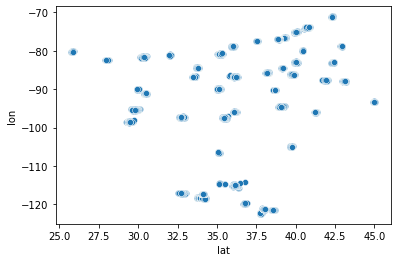

In [22]:
# Es preten dibuixar les latituds i longituds dels casos amb un scatter plot

sns.scatterplot(data = dfc, x = "lat", y = "lon")
plt.show()

Previsiblement aquí es podria situar un mapa d'estats units i poder observar com quedarien dispersats els casos

### 3.3 Disseny: com representar les dades

Està clar que amb totes aquestes variables quantitatives i qualitatives, les represetnacions que es poden fer per a donar resposta a les preguntes plantejades con molt variades.

Important marcar com serà la presentació:

- Es proposa colors negres, grisos i vermells molt poc saturats, ja que es tracta de dades tristes
- Es proposa afegir informació extra com la proporció de negres i blancs en EEUU
- Afegir característiques d'EEUU com armes de curs legal o desigualtat en les grans ciutats

Es planteja el següent a mode de representació de dades:

- Un mapa d'EEUU on es classifiqui els estats per quantitat de morts, i així identificar els estats més segurs.
- Un aluvial diagram per a veure segons la raça, quin gènere i com acava el cas. Si realment s'implica tot per igual.
- Diagrama de violí per veure el nombre de casos per edat.
- OHLC chart per a veure l'evolució dels casos per any. Evaluar si es va pacificant l'escenari. 

Apart de l'infograma, es decideix provar el mòdul folium per generar un mapa de calor sobre els assassinats. Així doncs:

In [23]:
from glob import glob
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap

In [24]:
# Es crea l'índex de punts

index = list(dfc.index.values)
dades = []

# Es generen les posicions de tots els punts

for n in index:
    dades.append([dfc.loc[n, 'lat'], dfc.loc[n, 'lon'], 0.25])

In [25]:
# Es defineix les coordenades inicials on es centra le mapa (EEUU)

boulder_coords = [40, -100]

# Es crea el mapa

my_map = folium.Map(location = boulder_coords, zoom_start = 4)

# Es defineix el tipus (Heatmap) i s'afegeixen els punts

HeatMap(dades).add_to(folium.FeatureGroup(name='Heat Map').add_to(my_map))
folium.LayerControl().add_to(my_map)
    
# Es mostra el mapa

my_map

És interessant veure com hi ha estats que no es veuen afectats per els assasinats. Seria bo fer un zoom a la ciutat més tacada i veure els barris més segurs.

In [26]:
dfc.groupby(['city']).count()['disposition']

city
Albuquerque        321
Atlanta            968
Baltimore         2827
Baton Rouge        423
Birmingham         786
Boston             612
Buffalo            512
Charlotte          661
Chicago           5529
Cincinnati         693
Columbus          1070
Denver             312
Detroit           2497
Durham             276
Fort Worth         549
Fresno             481
Houston           2908
Indianapolis      1322
Jacksonville      1151
Kansas City       1187
Las Vegas         1361
Long Beach         378
Los Angeles       2197
Louisville         573
Memphis           1513
Miami              731
Milwaukee         1115
Minneapolis        366
Nashville          756
New Orleans       1397
New York           625
Oakland            946
Oklahoma City      653
Omaha              404
Philadelphia      3036
Pittsburgh         629
Richmond           317
Sacramento         371
San Antonio        825
San Bernardino     275
San Diego          450
San Francisco      663
Savannah           236
St. Lo

la màxima és Chicago així que visualitzem:

In [27]:
# Es defineix les coordenades inicials on es centra le mapa (Chicago)

boulder_coords = [41.8255, -87.7740]

# Es crea el mapa

map_chicago = folium.Map(location = boulder_coords, zoom_start = 10)

# Es defineix el tipus (Heatmap) i s'afegeixen els punts

HeatMap(dades).add_to(folium.FeatureGroup(name='Heat Map').add_to(map_chicago))
folium.LayerControl().add_to(map_chicago)

# Es mostra el mapa

map_chicago

Des d'aquí s'anima a fer zoom, ampliant i veient les diferents àrees del mapa.

In [28]:
# Es guarda el mapa en estern en html

my_map.save('medium_map.html')

In [29]:
# Per a la representació del mapa en la presentació s'empren les següents dades

dfc.groupby(['state', 'city']).count()

victim_race  victim_age  victim_sex   lat   lon  \
state city                                                              
AL    Birmingham              786         786         786   786   786   
      Tulsa                     1           1           1     1     1   
CA    Fresno                  481         481         481   481   481   
      Long Beach              378         378         378   378   378   
      Los Angeles            2197        2197        2197  2197  2197   
      Oakland                 946         946         946   946   946   
      Sacramento              371         371         371   371   371   
      San Bernardino          275         275         275   275   275   
      San Diego               450         450         450   450   450   
      San Francisco           663         663         663   663   663   
      Stockton                440         440         440   440   440   
CO    Denver                  312         312         312   312   312   
DC    Washington             1344        1344        1344  1344  1344   
FL    Jacksonville           1151        1151        1151  1151  1151   
      Miami                   731         731         731   731   731   
      Tampa                   198         198         198   198   198   
GA    Atlanta                 968         968         968   968   968   
      Savannah                236         236         236   236   236   
IL    Chicago                5529        5529        5529  5529  5529   
IN    Indianapolis           1322        1322        1322  1322  1322   
KY    Louisville              573         573         573   573   573   
LA    Baton Rouge             423         423         423   423   423   
      New Orleans            1397        1397        1397  1397  1397   
MA    Boston                  612         612         612   612   612   
MD    Baltimore              2827        2827        2827  2827  2827   
MI    Detroit                2497        2497        2497  2497  2497   
MN    Minneapolis             366         366         366   366   366   
MO    Kansas City            1187        1187        1187  1187  1187   
      St. Louis              1661        1661        1661  1661  1661   
NC    Charlotte               661         661         661   661   661   
      Durham                  276         276         276   276   276   
NE    Omaha                   404         404         404   404   404   
NM    Albuquerque             321         321         321   321   321   
NV    Las Vegas              1361        1361        1361  1361  1361   
NY    Buffalo                 512         512         512   512   512   
      New York                625         625         625   625   625   
OH    Cincinnati              693         693         693   693   693   
      Columbus               1070        1070        1070  1070  1070   
OK    Oklahoma City           653         653         653   653   653   
      Tulsa                   575         575         575   575   575   
PA    Philadelphia           3036        3036        3036  3036  3036   
      Pittsburgh              629         629         629   629   629   
TN    Memphis                1513        1513        1513  1513  1513   
      Nashville               756         756         756   756   756   
TX    Fort Worth              549         549         549   549   549   
      Houston                2908        2908        2908  2908  2908   
      San Antonio             825         825         825   825   825   
VA    Richmond                317         317         317   317   317   
wI    Milwaukee              1115        1115        1115  1115  1115   

                      disposition  reported_date_fixed  
state city                                              
AL    Birmingham              786                  786  
      Tulsa                     1                    1  
CA    Fresno                  481                  481  
      Long Be